## Exploring Maritime Piracy Incidents

National Geospatial-Intelligence Agency’s Maritime Safety Information portal provides a shapefile of all incidencts of maritine piracy in the form on Anti-shipping Activity Messages. 

This notebook demonstrates how to read the shapefile via geopandas and explore the trends of pirate incidents over the years.

Download [ASAM_shp.zip](https://msi.nga.mil/api/publications/download?key=16920958/SFH00000/ASAM_shp.zip&type=download)

In [205]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os

In [206]:
data_pkg_path = 'data'
filename = 'ASAM_events.shp'
file_path = os.path.join(data_pkg_path, filename)
gdf = gpd.read_file(file_path)

In [207]:
gdf

,reference,dateofocc,subreg,hostility_,victim_d,descriptio,hostilityt,hostilit_D,victim_l,victim_l_D,navarea,geometry
0,1990-9,1990-06-03,26,CUBAN GUNBOAT,BELESBAT QUEEN,A CUBAN GUNBOAT COMMANDEERED LUXURY YACHT BELE...,2,Naval Engagement,11,Vessel,IV,POINT (-75.13333 21.93333)
1,1990-10,1990-03-20,71,PIRATES,RO/RO SEA DRAGON,20 MARCH 1990. BORNEO. ...,1,Pirate Assault,3,Cargo Ship,XI,POINT (108.00000 3.00000)
2,1990-11,1990-03-20,61,PIRATES,RO/RO SUNRISE,20 MARCH 1990. SINGAPORE. ...,1,Pirate Assault,3,Cargo Ship,VIII,POINT (90.00000 -1.00000)
3,1989-16,1989-01-01,62,PEOPLES DEMOCRATIC REPUBLIC OF YEMEN,U.S. MARINERS,"RED SEA, YEMEN ...",2,Naval Engagement,13,Other,IX,POINT (42.00000 14.00000)
4,1989-17,1989-09-23,63,PIRATES,LASH STONEWALL JACKSON,Indian ocean ...,1,Pirate Assault,11,Vessel,VIII,POINT (80.30000 13.10000)
...,...,...,...,...,...,...,...,...,...,...,...,...
8498,2020-138,2020-03-27,62,None,None,"On 27 March at 1226 UTC, two skiffs with 5-6 p...",3,Suspicious Approach,9,Tanker,IX,POINT (54.51667 26.01667)
8499,2020-13,2020-02-02,71,None,None,"On 20 January, a product tanker was boarded by...",9,Attempted Boarding,9,Tanker,XI,POINT (103.88333 1.05000)
8500,2020-208,2020-05-14,57,None,None,"On 14 May, individuals in two skiffs approache...",3,Suspicious Approach,5,Merchant Vessel,II,POINT (2.48333 4.56667)
8501,2021-132,2021-06-29,22,None,Tanker,"PERU: On 28 June, at 16:00 local time, robbers...",11,Robbery,1,Anchored Ship,XVI,POINT (-77.51667 -12.01667)


`dateofocc` field contains event dates. We use Pandas `to_datetime()` function to convert them to datetime objects

In [208]:
gdf['dateofocc'] = pd.to_datetime(gdf['dateofocc'])

In [209]:
gdf['year'] = gdf.dateofocc.dt.to_period('Y')
gdf

,reference,dateofocc,subreg,hostility_,victim_d,descriptio,hostilityt,hostilit_D,victim_l,victim_l_D,navarea,geometry,year
0,1990-9,1990-06-03,26,CUBAN GUNBOAT,BELESBAT QUEEN,A CUBAN GUNBOAT COMMANDEERED LUXURY YACHT BELE...,2,Naval Engagement,11,Vessel,IV,POINT (-75.13333 21.93333),1990
1,1990-10,1990-03-20,71,PIRATES,RO/RO SEA DRAGON,20 MARCH 1990. BORNEO. ...,1,Pirate Assault,3,Cargo Ship,XI,POINT (108.00000 3.00000),1990
2,1990-11,1990-03-20,61,PIRATES,RO/RO SUNRISE,20 MARCH 1990. SINGAPORE. ...,1,Pirate Assault,3,Cargo Ship,VIII,POINT (90.00000 -1.00000),1990
3,1989-16,1989-01-01,62,PEOPLES DEMOCRATIC REPUBLIC OF YEMEN,U.S. MARINERS,"RED SEA, YEMEN ...",2,Naval Engagement,13,Other,IX,POINT (42.00000 14.00000),1989
4,1989-17,1989-09-23,63,PIRATES,LASH STONEWALL JACKSON,Indian ocean ...,1,Pirate Assault,11,Vessel,VIII,POINT (80.30000 13.10000),1989
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8498,2020-138,2020-03-27,62,None,None,"On 27 March at 1226 UTC, two skiffs with 5-6 p...",3,Suspicious Approach,9,Tanker,IX,POINT (54.51667 26.01667),2020
8499,2020-13,2020-02-02,71,None,None,"On 20 January, a product tanker was boarded by...",9,Attempted Boarding,9,Tanker,XI,POINT (103.88333 1.05000),2020
8500,2020-208,2020-05-14,57,None,None,"On 14 May, individuals in two skiffs approache...",3,Suspicious Approach,5,Merchant Vessel,II,POINT (2.48333 4.56667),2020
8501,2021-132,2021-06-29,22,None,Tanker,"PERU: On 28 June, at 16:00 local time, robbers...",11,Robbery,1,Anchored Ship,XVI,POINT (-77.51667 -12.01667),2021


Group values by year and calculate total piracy incidents for each year

In [210]:
counts = gdf.groupby('year').size()
counts

year
1978      2
1979      2
1980      2
1981      1
1983      2
1984      8
1985     17
1986     29
1987     24
1988     28
1989     17
1990     21
1991     28
1992     37
1993    102
1994     94
1995     90
1996     48
1997     73
1998     67
1999    133
2000    424
2001    311
2002    374
2003    390
2004    346
2005    342
2006    298
2007    324
2008    500
2009    491
2010    545
2011    483
2012    345
2013    367
2014    291
2015    275
2016    321
2017    354
2018    162
2019    153
2020    317
2021    262
2022      3
Freq: A-DEC, dtype: int64

Plot the trend of piracy incidents over time.

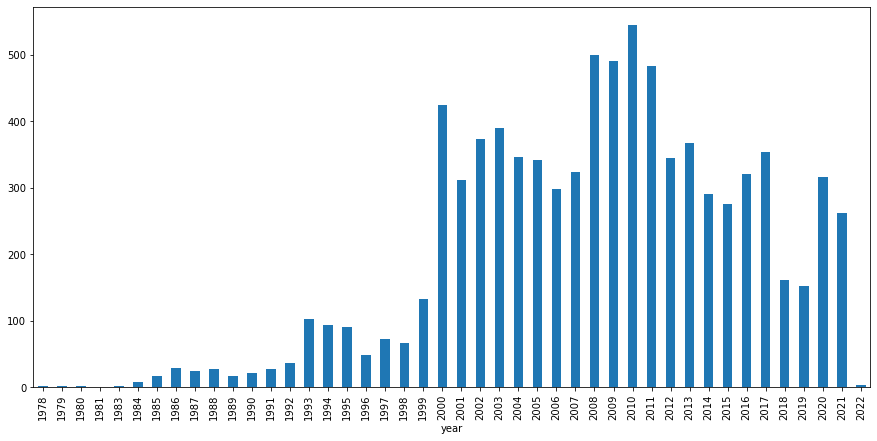

In [211]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
counts.plot(kind='bar', ax=ax)
plt.show()

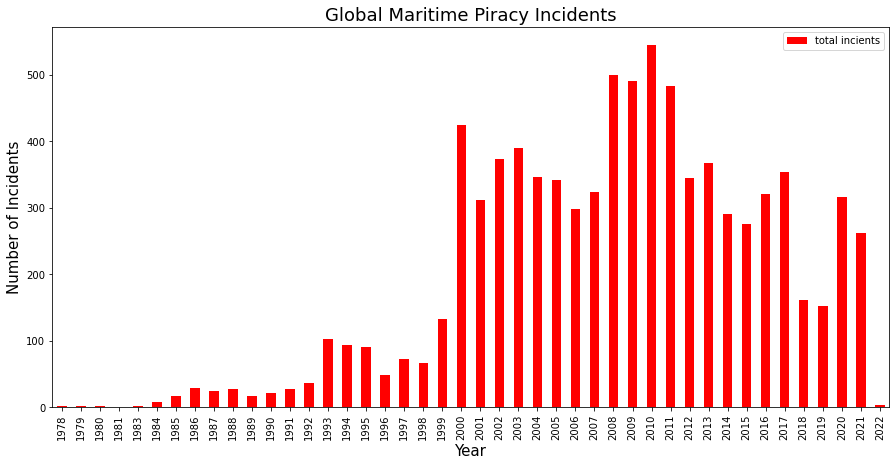

In [212]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
counts.plot(kind='bar', color='red', ax=ax)
plt.xlabel('Year', size = 15)
plt.ylabel('Number of Incidents', size = 15)
plt.title('Global Maritime Piracy Incidents', size = 18)
plt.legend(['total incients'])
plt.show()

In [213]:
gdf = gdf.dropna(subset=['hostilit_D'])

In [214]:
types = gdf['hostilityt'].unique()
description = gdf['hostilit_D'].unique()
type_dict = dict(zip(types, description))
type_dict

{2: 'Naval Engagement',
 1: 'Pirate Assault',
 6: 'Other',
 5: 'Unknown',
 4: 'Kidnapping',
 3: 'Suspicious Approach',
 11: 'Robbery',
 9: 'Attempted Boarding',
 10: 'Mothership Activity',
 7: 'Hijacking'}

In [215]:
counts = gdf.groupby(['year', 'hostilityt']).size()
counts

year  hostilityt
1978  1               1
      5               1
1979  5               2
1980  1               1
      5               1
                   ... 
2021  10              2
      11            144
2022  3               1
      7               1
      11              1
Length: 153, dtype: int64

In [216]:
counts_df = counts.unstack()
counts_df.rename(columns=type_dict, inplace=True)
counts_df

hostilityt,Pirate Assault,Naval Engagement,Suspicious Approach,Kidnapping,Unknown,Other,Hijacking,Attempted Boarding,Mothership Activity,Robbery
year,,,,,,,,,,
1978,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1979,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
1980,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1981,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1984,3.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
1985,6.0,8.0,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN
1986,12.0,5.0,NaN,2.0,3.0,7.0,NaN,NaN,NaN,NaN
1987,17.0,NaN,NaN,NaN,1.0,5.0,NaN,NaN,NaN,NaN


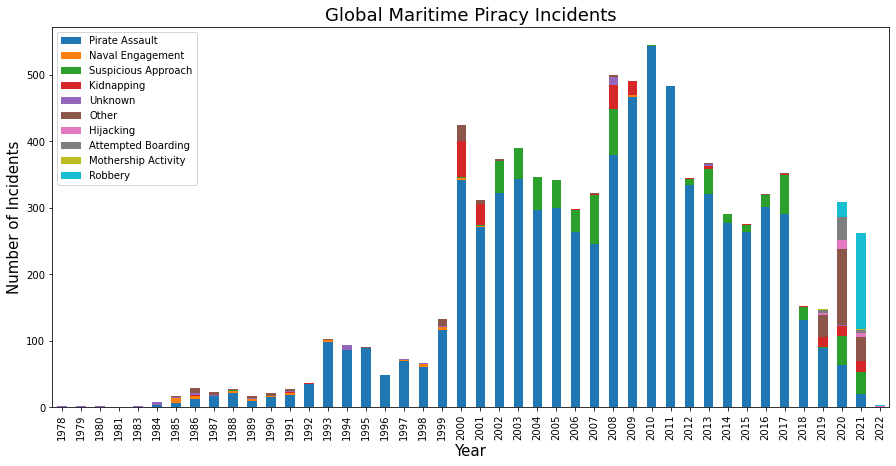

In [217]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
counts_df.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')
plt.legend()
plt.xlabel('Year', size = 15)
plt.ylabel('Number of Incidents', size = 15)
plt.title('Global Maritime Piracy Incidents', size = 18)
plt.show()

In [218]:
output_dir = 'output'
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

filename = 'stacked_barchart.jpg'
output_path = os.path.join(output_dir, filename)

In [219]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
counts_df.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')
plt.legend()
plt.xlabel('Year', size = 15)
plt.ylabel('Number of Incidents', size = 15)
plt.title('Global Maritime Piracy Incidents', size = 18)
plt.savefig(output_path, dpi=300, transparent=False, bbox_inches='tight')
plt.close()

![](stacked_barchart.jpg)